In [10]:
import numpy as np

In [11]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

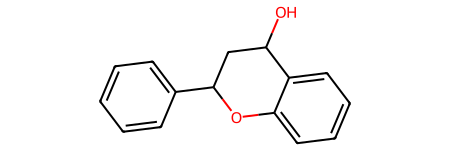

In [23]:
smiles = "OC1CC(OC2=CC=CC=C12)C1=CC=CC=C1"

chm = Chem.MolFromSmiles(smiles)

chm

In [28]:
ch2 = chm.GetSubstructMatches(Chem.MolFromSmarts("[CH]O[$([#6])&!$([CH](=O));!$(C(=O)[!O]);!$([CH3]);!$([CH2])"))
ch2

[11:36:10] SMARTS Parse Error: syntax error while parsing: [CH]O[!$([CH](=O))_100;!$(C(=O)[!O])_101;!CH3;!CH2
[11:36:10] SMARTS Parse Error: Failed parsing SMARTS '[CH]O[!$([CH](=O))_100;!$(C(=O)[!O])_101;!CH3;!CH2' for input: '[CH]O[!$([CH](=O));!$(C(=O)[!O]);!CH3;!CH2'


ArgumentError: Python argument types in
    Mol.GetSubstructMatches(Mol, NoneType)
did not match C++ signature:
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)

In [14]:
ch2_flat = np.array(ch2).flatten()
ch2_flat

array([ 6, 12, 13])

In [15]:
hide = chm.GetSubstructMatches(Chem.MolFromSmarts("[c][CH2]"))

hide_flat = np.array(hide).flatten()
hide_flat

array([ 2, 12,  5,  6])

In [16]:
hide2 = chm.GetSubstructMatches(Chem.MolFromSmarts("[CH2]O[!$([CH](=O));!$(C(=O)[!O]);CH2,CH,CH0,c&!CH3]"))

hide2_flat = np.array(hide2).flatten()
hide2_flat

array([6, 7, 8])

In [17]:
hides = np.append(hide, hide2)

In [18]:
elementos_faltantes = np.setdiff1d(ch2_flat, hide)
len(elementos_faltantes)

1

In [19]:
import ugropy as ug

In [20]:
g = ug.Groups(smiles, "smiles")

In [21]:
g.unifac_groups

array([{'CH3': 4, 'C': 1, 'ACH': 4, 'ACCH2': 1, 'CH2O': 1, 'CH2': 1, 'AC': 1}],
      dtype=object)